<a href="https://colab.research.google.com/github/Gurudevasura/Machine-Predictive-maintenance/blob/main/MPM_using_KNN_Decision_Trees_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Predictive Maintenance
Maintenance It a fuctional checks,Servicing,repairing or replacing of necessary equipment ,devices,Buliding Infrasturcture and support utilities in Business and Industial Installations. there are different type of maintenance: Predictive,Preventive,Corrective

**Predictive Maintenance**:Use sensor data to monitor the system,then continuously evaluates its action by the historical trends to predict failure before it occurs.

**Preventive Maintenance** which consists of intervening on a piece of equipment before it is faulty, in order to try to prevent any breakdown

**Corrective Maintenance** which consists of intervening on a piece of equipment when it is faulty.

In this notebook, we interest a predictive maintenance. We are going to build a machine learning model.

#IMPORTING REQUIRED LIBRARIES

In [1]:
pip install quick-eda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import quick_eda
from quick_eda.df_eda import df_eda
from quick_eda.column_eda import column_eda
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from warnings import filterwarnings

In [113]:
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')#Set the parameters that control the general style of the plots.The style parameters control properties like the color of the background and whether a grid is enabled by default. 
filterwarnings('ignore')#Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program

#LOADING AND DISPLAYING DATA

In [42]:
file ="/content/predictive_maintenance.csv"
maintenance = pd.read_csv(file, sep = ",", skipinitialspace = True)
df= maintenance 
maintenance

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# Exploratory data analysis
Here, we divide data in five independent failure modes (tool wear failure, heat dissipation failure, power failure, overstrain failure, random failure). We describe each failures modes.

**tool wear failure (TWF)**: the tool will be replaced of fail at a randomly selected tool wear time between 200 and 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

**heat dissipation failure (HDF)**: heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.

**power failure (PWF)**: the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

**overstrain failure (OSF)**: if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

**random failures (RNF)**: each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

What follows, we are going to see how many process fails.

#DATA OVERIVIEW & GRAPHICS

In [4]:
df_eda(df)

Head of dataframe:

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
- - - - - - - - - - - - - - - - - - - - - - - -

Tail of dataframe:

    

Pie Chart showing the different Failure Types

In [5]:
df["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [6]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

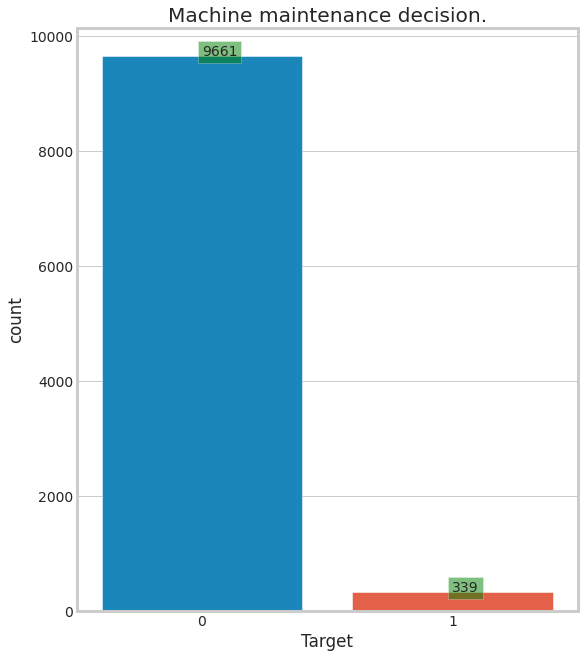

In [114]:
plt.figure(figsize=(8,10))
g=sns.countplot(x='Target', data=maintenance)
for i, u in enumerate(maintenance['Target'].value_counts().values):
    g.text(i, u, str(u), bbox=dict(facecolor='green', alpha=0.5))
plt.title('Machine maintenance decision.')
plt.show()

**Target are very unbalanced**.

**96.61%** of the datasets are **no failure** and **3.39%** of the datasets are **failure**.

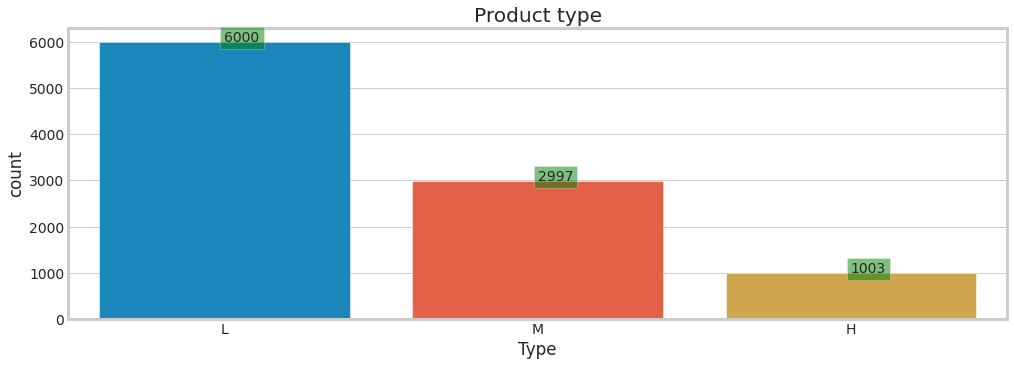

In [115]:
plt.figure(figsize=(15,5))
h=sns.countplot(x='Type', data=maintenance, order=['L','M','H'])
for i, u in enumerate(maintenance['Type'].value_counts().values):
    h.text(i, u, str(u), bbox=dict(facecolor='green', alpha=0.5))
plt.title('Product type')
plt.show()

Product type L are mojorities in the datatsets.

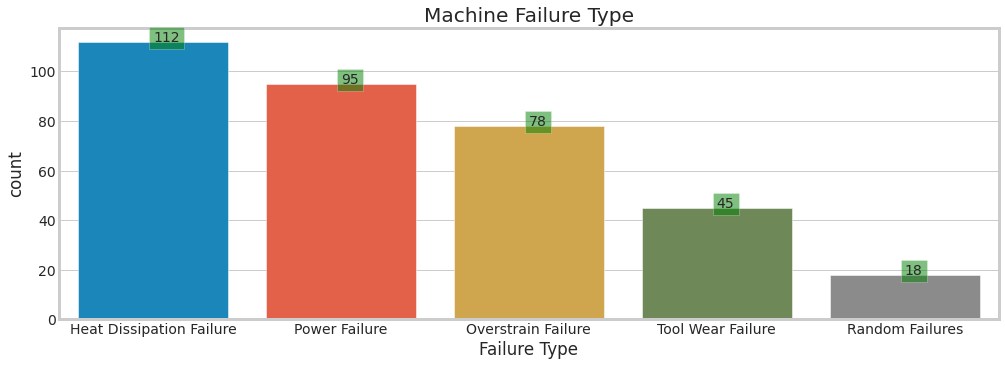

In [124]:
plt.figure(figsize=(15,5))
machine_failure = maintenance[maintenance['Failure Type'] != 'No Failure']
hg=sns.countplot(x='Failure Type', data=machine_failure, order=['Heat Dissipation Failure', 'Power Failure',
                                                              'Overstrain Failure', 'Tool Wear Failure',
                                                              'Random Failures'])
for i, u in enumerate(machine_failure['Failure Type'].value_counts().values):
    hg.text(i, u, str(u), bbox=dict(facecolor='green', alpha=0.5))
plt.title('Machine Failure Type')
plt.show()

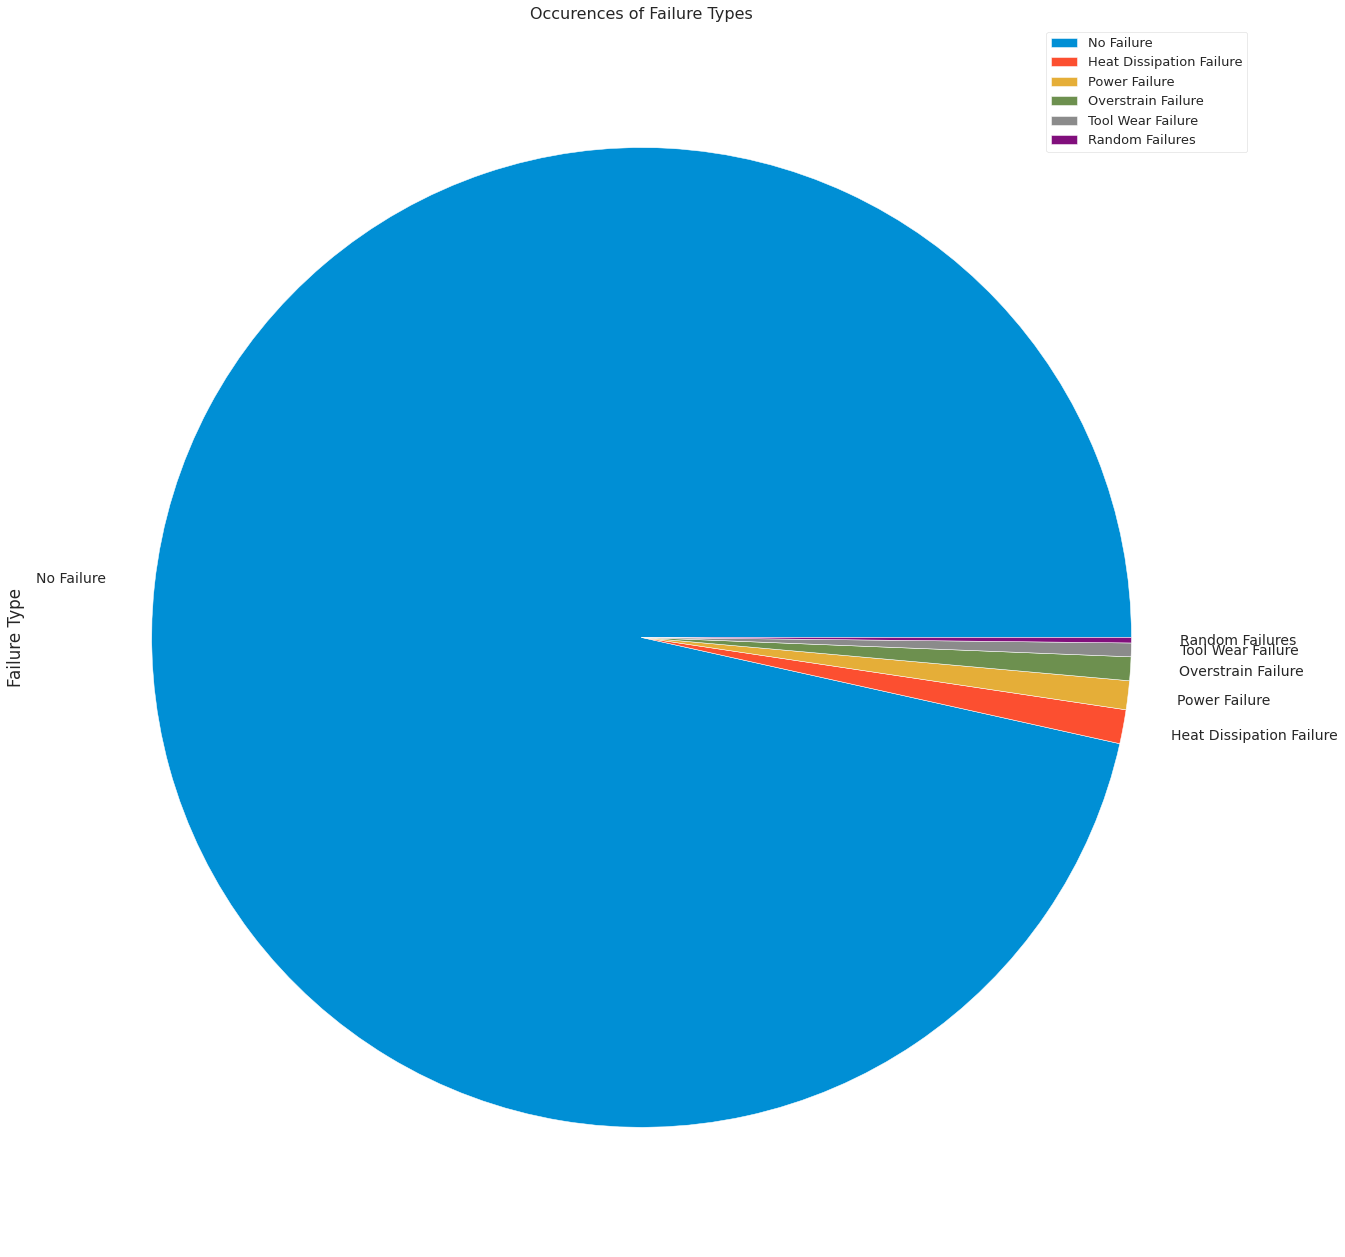

In [123]:
vc = df["Failure Type"].value_counts()

plt.title("Occurences of Failure Types", fontsize=16)

labels = ["No Failure", "Heat Dissipation Failure", "Power Failure", "Overstrain Failure", "Tool Wear Failure", "Random Failures"]

vc.plot(kind="pie", figsize=(21,21), startangle=360)

plt.legend(fontsize=13)
plt.show()

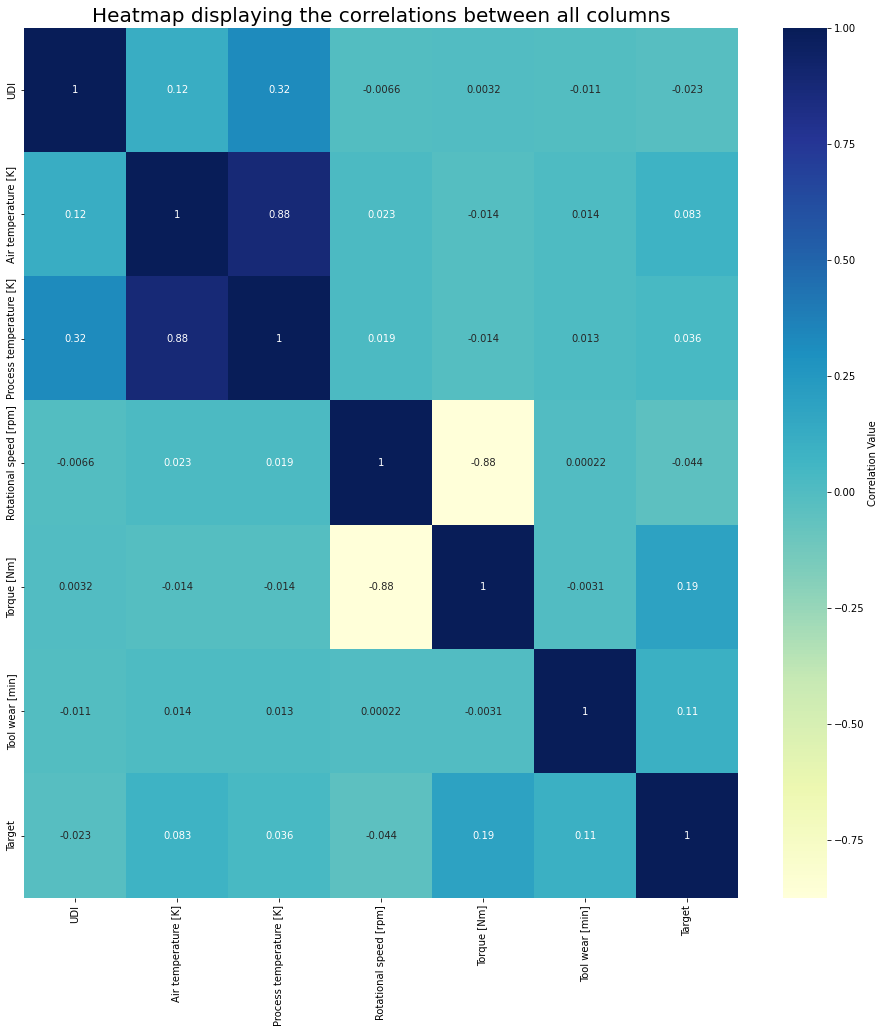

In [8]:
correlations = df.corr()

plt.figure(figsize=(16, 16))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(correlations, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})

#PREDICTING TARGET

Label Encoding data

In [9]:
df["Product ID"] = df["Product ID"].astype("str")
df["Type"] = df["Type"].astype("str")
df["Failure Type"] = df["Failure Type"].astype("str")

number = preprocessing.LabelEncoder()

df["Product ID"] = number.fit_transform(df["Product ID"])
df["Type"] = number.fit_transform(df["Type"])
df["Failure Type"] = number.fit_transform(df["Failure Type"])

Splitting data

In [10]:
X = df.drop(["Target"], axis = 1).values
y = df["Target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

Scaling data

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.978


Decision Tree

In [13]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.998


KNN

In [14]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.998


Evaluating model through prediction on test data

In [15]:
y_test_pred = model.predict(X_test)

In [16]:
# Predicted y values
print(y_test_pred)

[0 0 0 ... 0 0 0]


In [17]:
print(y_test)

[0 0 0 ... 0 0 0]


In [18]:
confusion_matrix(y_test, y_test_pred)

array([[2412,    0],
       [   5,   83]])

#PREDICTING FAILURE TYPE

In [ ]:
X = df.drop(["Failure Type"], axis = 1).values
y = df["Failure Type"].values

X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)



In [33]:
X_train.shape

(7500, 9)

In [32]:
 X_test.shape


(2500, 9)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
model = LogisticRegression(multi_class = "multinomial", solver = "saga")
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


0.9948


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Evaluating by checking if correct failure types were pedicted

In [22]:
y_test_pred = model.predict(X_test)

In [23]:
# Predicted failure types
print(y_test_pred) # Failure types are labeled (1 being no failure and so on...)

[1 1 1 ... 1 1 1]


In [24]:
predicted_failure_types = number.inverse_transform(y_test_pred)
predicted_failure_types

array(['No Failure', 'No Failure', 'No Failure', ..., 'No Failure',
       'No Failure', 'No Failure'], dtype=object)

In [25]:
# Real failure types
print(y_test)

[1 1 1 ... 1 1 1]


In [26]:
real_failure_types = number.inverse_transform(y_test)
real_failure_types

array(['No Failure', 'No Failure', 'No Failure', ..., 'No Failure',
       'No Failure', 'No Failure'], dtype=object)

In [67]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
confusion_matrix(y_test, y_test_pred)

array([[  26,    0,    0,    0,    0,    0],
       [   2, 2408,    1,    1,    0,    1],
       [   0,    0,   25,    0,    0,    0],
       [   0,    0,    0,   21,    0,    0],
       [   0,    4,    0,    0,    0,    0],
       [   0,    0,    4,    0,    0,    7]])

In [125]:
from numpy.core.numeric import indices
from sklearn.utils.multiclass import unique_labels
labels=['Heat Dissipation Failure', 'Power Failure','Overstrain Failure', 'Tool Wear Failure','Random Failures']
def plot(y_test, y_test_pred):
   labels =unique_labels(y_test)
   column = [f'Predicted{label}' for label in labels]
   indices = ['Heat Dissipation Failure', 'No Failure','Power Failure','Overstrain Failure', 'Tool Wear Failure','Random Failures']#[f'Actual{label}' for label in labels]
   table = pd.DataFrame(confusion_matrix(y_test, y_test_pred)
                        ,columns=column,index=indices)
    
   return table    

In [126]:
plot(y_test, y_test_pred)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5
Heat Dissipation Failure,26,0,0,0,0,0
No Failure,2,2408,1,1,0,1
Power Failure,0,0,25,0,0,0
Overstrain Failure,0,0,0,21,0,0
Tool Wear Failure,0,4,0,0,0,0
Random Failures,0,0,4,0,0,7


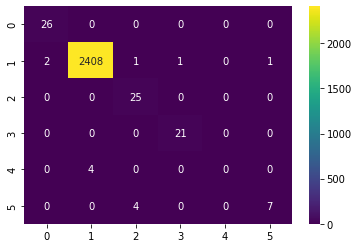

In [108]:
def plot2(y_test, y_test_pred):
   labels =unique_labels(y_test)
   column = [f'Predicted{label}' for label in labels]
   indices = [f'Actual{label}' for label in labels]
   table = pd.DataFrame(confusion_matrix(y_test, y_test_pred)
                        ,columns=column,index=indices)
    
   return sns.heatmap(cf_matrix, annot=True, fmt= 'd', cmap='viridis')


plot2(y_test, y_test_pred);